# Polynomial Hyperelasticity

## Overview

The polynomial hyperelastic model is a model in which the strain energy is a polynomial function of the invariants of the deformation tensor.  The polynomial hyperelastic model

- is a phenomenologial model,
- has an arbitrary number of parameters, though most materials use fewer than 4
- is typically fit to uniaxial extension/compression, equibiaxial extension/compression, or shear experimental data
- usually valid for strains less than 100%

## See Also

- [User Defined Materials](UserMaterial.ipynb)
- [Linear Elastic Material](LinearElastic.ipynb)
- [Mooney-Rivlien Hyperelasticity](MooneyRivlin.ipynb)

## Contents

1. <a href='#basic'>Fundamental Equations</a>
2. <a href='#implement'>Model Implementation</a>
3. <a href='#verify'>Model Verification</a>

<a name='basic'></a>
## Fundamental Equations

The strain energy in the polynomial hyperelastic model is defined as

$$
W = \sum_{i,j=0}^N c_{ij}\left(\overline{I}_1 - 3\right)^i \left(\overline{I}_2 - 3\right)^j + 
  + \frac{1}{D_1}\left(J-1\right)^2
$$

where the $c_{ij}$ and $D_1$ are material parameters, the $\overline{I}_i$ are the isochoric invariants of the right Cauchy deformation tensor $\pmb{C} = \pmb{F}^T{\cdot}\pmb{F}$, where $\pmb{F}$ is deformation gradient tensor, and $J$ is the determinant of the deformation gradient.

### The Second Piola-Kirchhoff Stress Tensor

$$
  \pmb{T} = 2\frac{\partial W}{\partial \pmb{C}}
$$

For isotropic hyperelasticity $W=W\left(\overline{I}_1, \overline{I}_2, J\right)$ and

$$
  \pmb{T} = 2\left(\frac{\partial W}{\partial \overline{I}_1}\frac{\partial \overline{I}_1}{\partial \pmb{C}} +
                   \frac{\partial W}{\partial \overline{I}_2}\frac{\partial \overline{I}_2}{\partial \pmb{C}} +
                   \frac{\partial W}{\partial J}\frac{\partial J}{\partial \pmb{C}}\right)
         = \pmb{A} \cdot \pmb{B}
$$

where

$$
  \pmb{A} = \left[\frac{\partial W}{\partial \overline{I}_1} \quad
              \frac{\partial W}{\partial \overline{I}_2} \quad
              \frac{\partial W}{\partial J}\right]
$$

and

\begin{align}
  \pmb{B} &= \left[
    \frac{\partial \overline{I}_1}{\partial \pmb{C}} \quad
    \frac{\partial \overline{I}_2}{\partial \pmb{C}} \quad
    \frac{\partial J}{\partial \pmb{C}}
  \right] \\
 &= \left[
    J^{-2/3}\left(\pmb{I} - \frac{1}{3}I_1 \pmb{C}^{-1} \right) \quad
    J^{-4/3}\left(
      I_1\pmb{I} - \pmb{C} - \frac{2}{3}I_2\pmb{C}^{-1} \right)\quad
    \frac{1}{2}J\pmb{C}^{-1} \right]
\end{align}


Elastic stiffness in the material frame is given by

\begin{align}
  \mathbb{L} &= 4\frac{\partial^2 W}{\partial\pmb{C}\partial\pmb{C}}
            = 4\frac{\partial}{\partial \pmb{C}}\left( \pmb{A}\cdot\pmb{B}\right) \\
            &= 4\left(\frac{\partial \pmb{A}}{\partial \pmb{C}}\cdot\pmb{B} +
                      \pmb{A}\cdot\frac{\partial \pmb{B}}{\partial \pmb{C}}\right)
\end{align}

where

\begin{equation}
  \frac{\partial \pmb{A}}{\partial \pmb{C}} = \pmb{H} \cdot \pmb{B}, \quad
  \pmb{H} = \begin{bmatrix}
    \frac{\partial^2 W}{\partial \overline{I}_1 \partial\overline{I}_1} &
    \frac{\partial^2 W}{\partial \overline{I}_1 \partial \overline{I}_2} &
    \frac{\partial^2 W}{\partial \overline{I}_1 \partial J} \\
    \frac{\partial^2 W}{\partial \overline{I}_2 \partial \overline{I}_1} &
    \frac{\partial^2 W}{\partial \overline{I}_2 \partial \overline{I}_2} &
    \frac{\partial^2 W}{\partial \overline{I}_2 \partial J} \\
    \frac{\partial^2 W}{\partial J \partial \overline{I}_1} &
    \frac{\partial^2 W}{\partial J \partial \overline{I}_2} &
    \frac{\partial^2 W}{\partial J \partial J}
  \end{bmatrix}
\end{equation}

and

\begin{equation}
  \frac{\partial \pmb{B}}{\partial \pmb{C}} = \begin{Bmatrix}
    \frac{1}{3}J^{-2/3}\left[
      \pmb{I}\pmb{C}^{-1}
      - \pmb{C}^{-1}\pmb{I}
      - I_1\left(
        \pmb{C}^{-1}\odot\pmb{C}{^-1}
        - \frac{1}{3}\pmb{C}^{-1}\pmb{C}{^-1}\right)
    \right] \\
    \frac{2}{3}J^{-4/3}\left[
      \frac{3}{2}\left(\mathbb{I}_1 - \mathbb{I}_2\right)
      + \left(\pmb{C}^{-1}\pmb{C}
        + \pmb{C}\pmb{C}^{-1}
      \right)
      - I_1\left(
        \pmb{C}^{-1}\pmb{I} + \pmb{I}\pmb{C}^{-1}
      \right)
      - I_2\left(
        \pmb{C}^{-1}\odot\pmb{C}^{-1}
        - \frac{2}{3}\pmb{C}^{-1}\pmb{C}^{-1}
      \right)
    \right] \\
    \frac{1}{4} J\left(
      \pmb{C}^{-1}\pmb{C}^{-1} - 2\pmb{C}^{-1}\odot\pmb{C}^{-1}
    \right)
  \end{Bmatrix}
\end{equation}

The operator $\odot$ is defined such that

$$
\mathbb{X}_{ijkl} = \pmb{A} \odot \pmb{B} = (A_{ik} B_{jl} + A_{il} B_{jk}) / 2
$$


### Requirements of Objectivity

The constitutive equations for the hyperelastic material evaluate the stress
directly in the reference configuration. The components of the stress are
identified as the components of the Second Piola-Kirchhoff stress $\pmb{T}$.
The push forward of the Second Piola-Kirchhoff stress gives the Cauchy stress
$\pmb{\sigma}$ in the spatial configuration, as required by most finite
element packages.  The push forward of the corresponding material stiffness
$\mathbb{L}$ does not, however, correspond to the rate of Cauchy stress but
the Truesdell rate of the Cauchy stress.  Furthermore, the rate of Cauchy
stress is not objective, requiring finite element packages to use other
so-called objective stress rates in the incremental solution of the momentum
equation.  In the following sections, it is demonstrated that the push forward
of the material stiffness does not correspond to the rate of Cauchy stress and
equations relating the stiffness corresponding to the Jaumann rate of the
Kirchhoff stress to the push forward of the material stiffness are developed.

The rate of change of Cauchy stress

\begin{align}
  \dot{\pmb{\sigma}} &= \frac{d}{dt}\left(
    \frac{1}{J}\pmb{F}\cdot\pmb{T}\cdot{\pmb{F}}^T
  \right) \\
  &= \frac{1}{J}\left[
    -\frac{\dot{J}}{J}\pmb{F}\cdot\pmb{T}\cdot{\pmb{F}}^T
    + \dot{\pmb{F}}\cdot\pmb{T}\cdot{\pmb{F}}^T
    + \pmb{F}
      \cdot\frac{d\pmb{T}}{d\pmb{E}}{:}\dot{\pmb{E}}
    \cdot{\pmb{F}}^T
   + \pmb{F}\cdot\pmb{T}\cdot\dot{\pmb{F}}^T
  \right]
\end{align}

With the following identities

\begin{equation}
  \mathrm{tr}{\pmb{d}} = \frac{\dot{J}}{J} \quad
  \dot{\pmb{F}} = \pmb{L}\cdot\pmb{F} \quad
  \dot{\pmb{E}} = \pmb{F}^T\cdot\pmb{d}\cdot\pmb{F} \quad
  \dot{\pmb{F}}^T = \pmb{F}^T\cdot\pmb{L}^T
\end{equation}



\begin{align}
  \dot{\pmb{\sigma}} &= \frac{1}{J}\left[
    -\mathrm{tr}{\pmb{d}}\pmb{\sigma}
    + \pmb{L}\cdot\pmb{F}\cdot\pmb{T}\cdot{\pmb{F}}^T
    + \pmb{F}\cdot\mathbb{L}{:}\left(
      \pmb{F}^T\cdot\pmb{d}\cdot\pmb{F}
    \right)\cdot\pmb{F}^T
    + \pmb{F}\cdot\pmb{T}\cdot\pmb{F}^T\cdot\pmb{L}^T
  \right] \\
  &= -\mathrm{tr}{\pmb{d}}\pmb{\sigma}
    + \pmb{L}\cdot\pmb{\sigma}
    + \frac{1}{J}\left(
      \pmb{F}\cdot\pmb{F}\cdot
      \mathbb{L}
      \cdot\pmb{F}^T\cdot\pmb{F}^T
    \right){:}\pmb{d}
    + \pmb{\sigma}\cdot\pmb{L}^T \\
  &= -\mathrm{tr}{\pmb{d}}\pmb{\sigma}
    + \pmb{L}\cdot\pmb{\sigma}
    + \mathbb{C}{:}\pmb{d}
    + \pmb{\sigma}\cdot\pmb{L}^T
\end{align}

rearranging

\begin{align}
  \dot{\pmb{\sigma}}
  - \pmb{\sigma}\cdot\pmb{L}^T
  - \pmb{L}\cdot\pmb{\sigma}
  + \mathrm{tr}{\pmb{d}}\pmb{\sigma}
  &= \mathbb{C}{:}\pmb{d} \\
  \mathring{\pmb{\sigma}} &= \mathbb{C}{:}\pmb{d}
\end{align}

where

\begin{align}
  \mathring{\pmb{\sigma}} = \dot{\pmb{\sigma}}
  - \pmb{\sigma}\cdot\pmb{L}^T
  - \pmb{L}\cdot\pmb{\sigma}
  + \mathrm{tr}{\pmb{d}}\pmb{\sigma}
\end{align}

is the Truesdell rate of the Cauchy stress.  The Truesdell rate of the Cauchy
stress is related to the Lie derivative of the Kirchhoff stress by

\begin{equation}
  \mathring{\pmb{\sigma}} = \frac{1}{J}\pmb{F}\cdot\dot{\pmb{T}}\pmb{F}^T
  = \frac{1}{J}\pmb{F}\cdot\left[\frac{d}{dt}\left(
      J\pmb{F}^{-1}\cdot\pmb{\sigma}\pmb{F}^{-T}
    \right)\right]\cdot\pmb{F}^T
  = \frac{1}{J}\pmb{F}\cdot\left[\frac{d}{dt}\left(
      \pmb{F}^{-1}\cdot\pmb{\tau}\pmb{F}^{-T}
    \right)\right]\cdot\pmb{F}^{T}
  = \frac{1}{J}\mathscr{L}\left({\pmb{\tau}}\right)
\end{equation}


Thus, the push forward of the material time derivative of $\pmb{T}$ is the
Truesdell rate of the Cauchy stress.  Correspondingly, the Truesdell rate of
the Kirchhoff stress is related to the push forward of the material stiffness
$\mathbb{L}$ by

\begin{equation}
  \mathscr{L}\left({\pmb{\tau}}\right) = J\mathbb{C}{:}\pmb{d}
\end{equation}


In many finite element packages, the Jaumann rate of the Kirchhoff stress, and
not the Truesdell rate, is required. Thus, the elastic stiffness must
correspond to the Jaummann rate.. The Jaumann rate of the Kirchhoff stress is
given by

\begin{align}
  \stackrel{\nabla}{\pmb{\tau}} &= {
    \dot{\pmb{\tau}}
    + \pmb{\tau}\cdot\pmb{w}
    - \pmb{w}\cdot\pmb{\tau}
  } \\
  &= \dot{J}\pmb{\sigma}
    + J\dot{\pmb{\sigma}}
    + J\pmb{\sigma}\cdot\pmb{w}
    - \pmb{w}\cdot J\pmb{\sigma} \\
  &= J\left(\mathrm{tr}{\pmb{d}}\pmb{\sigma}
    + \dot{\pmb{\sigma}}
    + \pmb{\sigma}\cdot\pmb{w}
    - \pmb{w}\cdot J\pmb{\sigma}\right) \\
  &= J\mathbb{D}{:}\pmb{d}
\end{align}

where $\mathbb{D}$ is the stiffness corresponding to the Jaumann rate.
Subtracting $\mathring{\pmb{\tau}}$ from $\stackrel{\nabla}{\pmb{\tau}}$, the Jaumann stiffness
can be cast in terms of $\mathbb{C}$

\begin{align}
  \left(\mathbb{D} - \mathbb{C}\right){:}\pmb{d} &=
  \left(\mathrm{tr}{\pmb{d}}\pmb{\sigma}
    + \dot{\pmb{\sigma}}
    + \pmb{\sigma}\cdot\pmb{w}
    - \pmb{w}\cdot\pmb{\sigma}\right)
  -
  \left(\dot{\pmb{\sigma}}
    - \pmb{\sigma}\cdot{\pmb{L}}^T
    - \pmb{L}\cdot\pmb{\sigma}
    + \mathrm{tr}{\pmb{d}}\pmb{\sigma}\right) \\
  &= \pmb{\sigma}\cdot\pmb{w}
  + \pmb{\sigma}\cdot{\pmb{L}}^T
  + \pmb{L}\cdot\pmb{\sigma}
  - \pmb{w}\cdot\pmb{\sigma} \\
  &= \pmb{\sigma}\cdot\pmb{d} + \pmb{d}\cdot\pmb{\sigma} \\
\end{align}

Using indicial notation, and the fact that $\pmb{d}$ and $\pmb{\sigma}$
are symmetric,

\begin{align}
  \left(D_{ijkl} - C_{ijkl}\right)d_{kl}
  &= \sigma_{im}d_{mj} + d_{im}\sigma_{mj} \\
  &= \left(
    \sigma_{ik}\delta_{jl} + \delta_{il}\sigma_{jk}
  \right)d_{kl}
\end{align}

from which

\begin{align}
  \left(
    D_{ijkl}
    - C_{ijkl}
    - \sigma_{ik}\delta_{jl}
    - \delta_{il}\sigma_{jk} \right)d_{kl} = 0_{ij}
\end{align}

Since the preceding equation must hold for all $d_{kl}$, the stiffness
corresponding to the Jaumman rate of the Kirchhoff stress is related to the
stiffness corresponding to the Truesdell rate of the Kirchhoff stress as

\begin{align}
  D_{ijkl} = C_{ijkl} + \sigma_{ik}\delta_{jl}
    + \delta_{il}\sigma_{jk}
\end{align}

Note that the stiffness must be made minor
symmetric

\begin{align}
  D_{ijkl} = C_{ijkl} + \frac{1}{2}\left(
    \sigma_{ik}\delta_{jl} +
    \sigma_{il}\delta_{jk} +
    \delta_{il}\sigma_{jk} +
    \delta_{ik}\sigma_{jl}
  \right)
\end{align}

In symbolic notation,

$$
\mathbb{D} = \mathbb{C} + \pmb{\sigma}\odot\pmb{I} + \pmb{I}\odot\pmb{\sigma}
$$

which is the correct stiffness corresponding to the Jaumann rate of the Kirchhoff
stress, in terms of the push forward of the material stiffness.  Equations relating $\mathbb{C}$ to stiffnesses corresponding to other objective rates are derived similarly.

<a name='implement'></a>

## Matmodlab Implementation

Below, a polynomial material model is implemented as a standard Matmodlab material, subclassing the base `MaterialModel` class.  The model defines the following (required) attributes and methods

- `name`: name by which the model is referenced   
- `param_names`: method returning names of model parameters
- `update_state`: method the updates the material state
- `setup`: checks user input

Additionally, several helper functions are imported from various locations in Matmodlab:

- `matmodlab.utils.tensor`

   - `symsq`: Computes $\pmb{F}^T{\cdot}\pmb{F}$ and returns the result as a 6D first order tensor
   - `det`, `inv`: Computes the determinant and inverse of second order tensors (stored as matrix or array)
   - `invariants`: Computes the invariants of a second order tensor
   - `push`: Performs the push forward operation (for both second and fourth order tensors)
   - `dyad`: Computes the dyadic product of two vectors or second order tensors
   - `symshuffle`: Computes the product $X_{ijkl} = .5 (A_{ik} B_{jl} + A_{il} B_{jk}$)
   - `II1`, `II5`: Fourth order identity tensors
   
- `matmodlab.constants`
   - `I6`: Identity tensor stored as an array of length 6

### Loading the Material Model

Once defined in a computational cell, the material model is loaded in to Matmodlab through the `load_material` function using the `std_material` keyword.

In [1]:
%matmodlab

BokehJS successfully loaded.

Populating the interactive namespace from matmodlab and bokeh


In [2]:
import logging
from numpy import dot, zeros, trace, array, sum, eye
from matmodlab.mmd.material import MaterialModel
from matmodlab.utils.tensor import (symsq, det, invariants, inv, push,
             dyad, symshuffle, II1, II5)
from matmodlab.constants import I6

class UserPolyHyper(MaterialModel):
    name = "upolyhyper"

    @classmethod
    def param_names(cls, n):
        return ['C10','C01','C20','C11','C02','C30','C21',
                'C12','C03','D1', 'D2', 'D3']

    def setup(self, **kwargs):
        """Set up the polynomial hyperelastic material

        """
        logger = logging.getLogger('matmodlab.mmd.simulator')

    def update_state(self, time, dtime, temp, dtemp, energy, rho, F0, F,
        stran, d, elec_field, stress, statev, **kwargs):
        """Compute updated stress given the updated deformation"""

        # Right deformation and invariants
        C = symsq(F)
        I1, I2, I3 = invariants(C)
        Jac = sqrt(I3)
        
        scale = Jac ** (-1. / 3.)
        
        IB1 = I1 * scale ** 2
        IB2 = I2 * scale ** 4
        
        # elastic energy
        u, du, d2u, d3u = uhyper(self.parameters, IB1, IB2, Jac)

        # PK2 stress
        Ci = inv(C) 
        B = zeros((3, 6))
        B[0,:] = scale ** 2 * (I6 - I1 * Ci / 3.)
        B[1,:] = scale ** 4 * (I1 * I6 - C - 2. * I2 * Ci / 3.)
        B[2,:] = .5 * Jac * Ci

        # second Piola-Kirchhoff stress: derivative of energy wrt C
        T = zeros(6)
        for i in range(6):
            T[i] = 2.* sum(du * B[:, i], axis=0)
        
        # Cauchy stress
        stress = push(F, T)
        
        # The elastic stiffness
        CICI = dyad(Ci, Ci)
        CIC = dyad(Ci, C)
        CCI = dyad(C, Ci)
        LCICI = symshuffle(Ci, Ci)
        ICI = dyad(I6, Ci)
        CII = dyad(Ci, I6)

        # DA/DC
        DA = zeros((3,6))
        DA[0,:] = d2u[0] * B[0,:] + d2u[3] * B[1,:] + d2u[4] * B[2,:]
        DA[1,:] = d2u[3] * B[0,:] + d2u[1] * B[1,:] + d2u[5] * B[2,:]
        DA[2,:] = d2u[4] * B[0,:] + d2u[5] * B[1,:] + d2u[2] * B[2,:]
         
        # DB/DC
        DB = zeros((3,6,6))

        TERM1 = CII + ICI
        TERM2 = I1 * (LCICI + CICI / 3.)
        DB[0,:,:] = 1. / 3. * scale ** 2 * (-TERM1 + TERM2)

        TERM1 = 3. / 2. * (II1 - II5) + (CIC + CCI)
        TERM2 = -I1 * (CII + ICI) + I2 * (LCICI + 2. / 3. * CICI)
        DB[1,:,:] = 2. /  3. * scale ** 4 * (TERM1 + TERM2)

        DB[2,:,:] = 1. / 4. * Jac * (CICI - 2. * LCICI)

        # ISOCHORIC PART
        Liso = zeros((6,6))
        for I in range(2):
            TERM1 = 4. * (dyad(DA[I,:], B[I,:]) + du[I] * DB[I,:,:])
            Liso += TERM1
        Liso = .5 * (Liso + Liso.T)

        # VOLUMETRIC PART
        Lvol = 4. * (dyad(DA[2,:], B[2,:]) + du[2] * DB[2,:,:])
        Lvol = .5 * (Lvol + Lvol.T)
        
        # the constitutive equations for the hyperelastic material gives the
        # stress in the spatial configuration (cauchy stress). however, the
        # constitituve response is in terms of the lie derivative, or truesdell
        # rate, of the kirchoff stress. the jaummann rate is an alternative lie
        # derivative, given by
        #                              _   .
        #                              s = s + s.w - w.s
        #       _
        # where s is the jaummann rate of the cauchy stress s. using the jaummann
        # rate, the constitutive response in the corotated frame is given by
        #                                 _   
        #                                 s = D:d
        #       _
        # where c is the jaummann tangent stiffness tensor and is defined
        # implicity from
            #                           _
        #                           s = c:d + d.s + s.d
        # from which
        #           
        #           D = c + .5 (iik sjl + iil sjk + sik ijl + sil ijk)
        L = Liso + Lvol
        C = push(F, L)
        TERM1 = symshuffle(I6, stress)
        TERM2 = symshuffle(stress, I6)
        D = C + (TERM1 + TERM2)
        
        # Return it all
        return stress, statev, D

def uhyper(c, IB1, IB2, Jac):
    """HYPERELASTIC POLYNOMIAL MODEL"""
    # Energies
    u = zeros(2)
    u[1] += c[0] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 0)
    u[1] += c[1] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 1)
    u[1] += c[2] * ((IB1 - 3.) ** 2) * ((IB2 - 3.) ** 0)
    u[1] += c[3] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 1)
    u[1] += c[4] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 2)
    u[1] += c[5] * ((IB1 - 3.) ** 3) * ((IB2 - 3.) ** 0)
    u[1] += c[6] * ((IB1 - 3.) ** 2) * ((IB2 - 3.) ** 1)
    u[1] += c[7] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 2)
    u[1] += c[8] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 3)
    if (c[9] > 1e-14): u[0] += 1. / c[9] * (Jac - 1.) ** 2
    if (c[10] > 1e-14): u[0] += 1. / c[10] * (Jac - 1.) ** 4
    if (c[11] > 1e-14): u[0] += 1. / c[11] * (Jac - 1.) ** 6
    u[0] = u[0] + u[1]

    # First Derivatives
    du = zeros(3)
    du[0] += 1.0 * c[0] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 0)
    du[0] += 2.0 * c[2] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 0)
    du[0] += 1.0 * c[3] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 1)
    du[0] += 3.0 * c[5] * ((IB1 - 3.) ** 2) * ((IB2 - 3.) ** 0)
    du[0] += 2.0 * c[6] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 1)
    du[0] += 1.0 * c[7] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 2)
    
    du[1] += 1.0 * c[1] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 0)
    du[1] += 1.0 * c[3] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 0)
    du[1] += 2.0 * c[4] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 1)
    du[1] += 1.0 * c[6] * ((IB1 - 3.) ** 2) * ((IB2 - 3.) ** 0)
    du[1] += 2.0 * c[7] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 1)
    du[1] += 3.0 * c[8] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 2)
    
    if (c[9] > 1e-14): du[2] += 2.0 / c[9] * (Jac - 1.) ** 1
    if (c[10] > 1e-14): du[2] += 4.0 / c[10] * (Jac - 1.) ** 3
    if (c[11] > 1e-14): du[2] += 6.0 / c[11] * (Jac - 1.) ** 5

    # Second Derivatives
    ddu = zeros(6)
    ddu[0] += 2.0 * c[2] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 0)
    ddu[0] += 6.0 * c[5] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 0)
    ddu[0] += 2.0 * c[6] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 1)
    

    ddu[1] += 2.0 * c[4] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 0)
    ddu[1] += 6.0 * c[8] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 1)
    ddu[1] += 2.0 * c[7] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 0)
 
    ddu[3] += 1.0 * c[3] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 0)
    ddu[3] += 2.0 * c[6] * ((IB1 - 3.) ** 1) * ((IB2 - 3.) ** 0)
    ddu[3] += 2.0 * c[7] * ((IB1 - 3.) ** 0) * ((IB2 - 3.) ** 1)

    if (c[9] > 1e-14): ddu[2] += 2.0 / c[9] * (Jac - 1.) ** 0
    if (c[10] > 1e-14): ddu[2] += 12.0 / c[10] * (Jac - 1.) ** 2
    if (c[11] > 1e-14): ddu[2] += 30.0 / c[11] * (Jac - 1.) ** 4

    # Third Derivatives
    dddu = zeros(6)
    if (c[10] > 1e-14): dddu[5] += 24.0 / c[10] * (Jac - 1.) ** 1
    if (c[11] > 1e-14): dddu[5] += 120.0 / c[11] * (Jac - 1.) ** 3
    
    return u, du, ddu, dddu

load_material(UserPolyHyper)

<a name='verify'></a>
## Verification

### Uniaxial Stress

For an incompressible isotropic material, uniaxial stress is produced by the following deformation state

$$
[F] = \begin{bmatrix}\lambda && \\ & \frac{1}{\sqrt{\lambda}} & \\ & & \frac{1}{\sqrt{\lambda}} \end{bmatrix}
$$

The stress difference $\sigma_{\text{axial}} - \sigma_{\text{lateral}}$ is given by

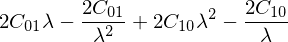

In [3]:
from sympy import Symbol, Matrix, Rational, symbols, sqrt
lam = Symbol('lambda')
F = Matrix(3, 3, [lam, 0, 0, 0, 1/sqrt(lam), 0, 0, 0, 1/sqrt(lam)])
B = Matrix(3, 3, F.dot(F.T))
Bsq = Matrix(3, 3, B.dot(B))
I = Matrix(3, 3, lambda i,j: 1 if i==j else 0)
I1 = B.trace()
I2 = ((B.trace()) ** 2 - Bsq.trace()) / 2
J = F.det()
X = J ** Rational(1, 3)
C1, C2, D1 = symbols('C10 C01 D1')
I1B = I1 / X ** 2
I2B = I2 / X ** 4

S = 2 / J * (1 / X ** 2 * (C1 + I1B * C2) * B - 1 / X ** 4 * C2 * Bsq) \
    + (2 / D1 * (J - 1) - 2 * (C1 * I1B + 2 * C2 * I2B) / 3) * I
(S[0,0] - S[1,1]).simplify()

We now exercise the Mooney-Rivlin material model using Matmodlab

In [4]:
# Hyperelastic parameters, D1 set to a large number to force incompressibility
parameters = {'D1': 1.e-5, 'C10': 1e6, 'C01': .1e6}

# stretch to 300%
lam = linspace(.5, 3, 50)

# Set up the simulator
mps = MaterialPointSimulator('test1')
mps.Material('upolyhyper', parameters)

# Drive the *incompressible* material through a path of uniaxial stress by
# prescribing the deformation gradient.
Fij = lambda x: (x, 0, 0, 0, 1/sqrt(x), 0, 0, 0, 1/sqrt(x))
mps.DefGradStep(components=Fij(lam[0]), frames=10)
mps.DefGradStep(components=Fij(1), frames=1)
mps.DefGradStep(components=Fij(lam[-1]), frames=20)

# plot the analytic solution and the simulation
p = create_figure(x_axis_label='Stretch', y_axis_label='Stress')
C10, C01 = parameters['C10'], parameters['C01']

# analytic solution for true and engineering stress
s = 2*C01*lam - 2*C01/lam**2 + 2*C10*lam**2 - 2*C10/lam

# plot the analytic solutions
p.line(lam, s, color='blue', legend='True', line_width=2)
p.line(lam, s/lam, color='green', legend='Engineering', line_width=2)

lam_ = np.exp(mps.get('E.XX'))
ss = mps.get('S.XX') - mps.get('S.ZZ')
p.circle(lam_, ss, color='orange', legend='Simulation, True')
p.circle(lam_, ss/lam_, color='red', legend='Simulation, Engineering')
p.legend.location = 'top_left'

show(p)

# check the actual solutions
assert abs(amax(ss) - amax(s)) / amax(s) < 1e-6
assert abs(amin(ss) - amin(s)) < 1e-6